Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (2)
## 20.04.2021. 

# Pavle Šarenac 2020/0359

#### __Zadatak 1__: Model sa promenljivom brzinom
Simulirati model protoka saobraćaja koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + \frac{\partial}{\partial x}\left(v(\rho)\rho(x,t)\right) = 0
\end{equation}

u kome brzina vozila nije konstantna već zavisi od gustine (a samim tim i od koordinate $x$ i vremena $t$). 

U fajlu <font color='blue'>traffic_data.csv</font> nalaze se podaci dobijeni snimanjem protoka saobraćaja u Linkoln tunelu, koji prolazi ispod reke Hadson i povezuje Nju Džersi sa centrom Menhetna. U prvoj koloni nalazi se gustina vozila (data u jedinicama kola/milji) a u drugoj koloni njhova brzina (data u jedinicama milja/sat).

a) Koristeći se pandas bibliotekom, napraviti Python skriptu u okviru koje treba učitati .csv fajl, a zatim konvertovati jedinice u kola/kilometru (1/km) i kilometar/sat (km/h) i prikazati ovu zavisnost u okviru jednog scatter grafika. Obeležiti ose grafika. 

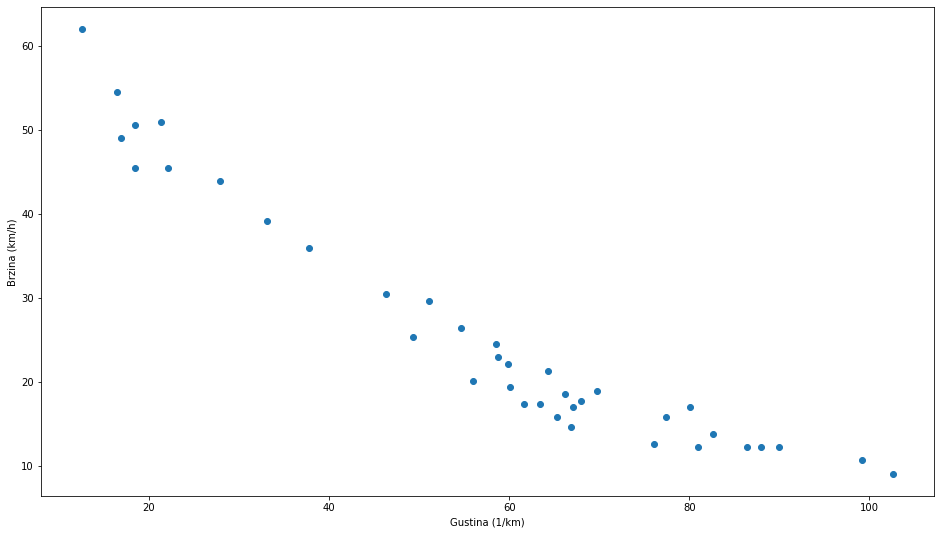

In [29]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from mpl_toolkits import mplot3d

# ucitavanje datoteke
traffic_data = pd.read_csv('traffic_data.csv')
mileInKm = 1.609344  # 1 milja = 1.609344 kilometra

# konvertovanje mernih jedinica
density = traffic_data["gustina"] / mileInKm  # kola/mile --> kola/km
velocity = traffic_data["brzina"] * mileInKm  # mile/h  --> km/h

# iscrtavanje scatter grafika
plt.figure(figsize=(16, 9))
plt.scatter(density, velocity)
plt.xlabel("Gustina (1/km)")
plt.ylabel("Brzina (km/h)")
plt.show()

Grinšilds-ov model pretpostavlja linearnu zavisnost brzine od gustine i dat je sledećom linearnom funkcijom:

\begin{equation}
    v(\rho) = v_\text{m}\left(1 - \frac{\rho}{\rho_\text{m}}\right)
\end{equation}

gde je $v_\text{m}$ maksimalna brzina vozila, a $\rho_\text{m}$ maksimalna gustina vozila (kada bi sva vozila bila pozicionirana jedna iza drugog, bez razmaka). 

b) Koristeći <font color='blue'>scipy.optimize.curve_fit</font> (Python funkcija koja povlači optimalnu pravu kroz dati skup tačaka, pogledati help) pronaći koeficijente $v_\text{m}$ i $\rho_\text{m}$ koji definišu optimalnu pravu. Koeficijente pronaći u jedinicama km/h i 1/km, respektivno. Nacrtati grafik na kome su eksperimentalni podaci nacrtati crvenim tačkama, a optimalna prava plavom linijom. Obeležiti ose grafika i na grafik staviti legendu. 

(Napomena: ukoliko se čini da je dobijena maksimalna brzina vozila previše mala, treba imati na umu da u tunelu postoji rigorozno ograničenje brzine. Proveriti dobijenu vrednost iz Python modela sa realnim ograničenjem koje se može naći na linku: https://en.wikipedia.org/wiki/Lincoln_Tunnel pod stavkom “operating speed”).


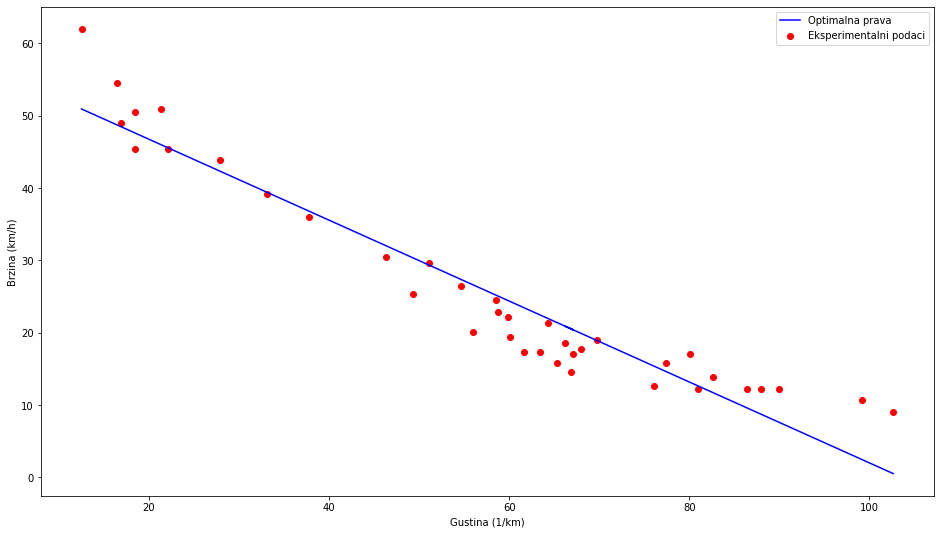

In [30]:
# linearna zavisnost brzine od gustine
def v_of_rho(density, max_density, max_velocity):
    return max_velocity * (1 - density / max_density)

# optimal_parameters ce biti niz [max_velocity, max_density], i to su parametri koji definisu optimalnu pravu
# covariance_parameters ce biti matrica sa odstupanjima - ukratko govori o nepreciznostima optimalne prave

optimal_parameters, covariance_parameters = curve_fit(v_of_rho, density, velocity)
max_density, max_velocity = optimal_parameters

# vrednosti na y-osi optimalne prave
y_axis = v_of_rho(density, max_density, max_velocity)

# iscrtavanje grafika - scatter + line of best fit
plt.figure(figsize=(16, 9))
plt.scatter(density, velocity, color="red", label="Eksperimentalni podaci")
plt.plot(density, y_axis, "b", label="Optimalna prava")
plt.xlabel("Gustina (1/km)")
plt.ylabel("Brzina (km/h)")
plt.legend()
plt.show()

Uneti dobijene vrednosti za $v_\text{m}$ i $\rho_\text{m}$.

$v_m \approx 57.91069 \frac{km}{h}$ <br>
$\rho_m \approx 103.54898 \frac{1}{km}$

c) Uzimajući u obzir funkcijsku zavisnost brzine od gustine, srediti jednačinu u oblik pogodan za primenu metode konačnih razlika, tako da jednačina ima formu:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + c(\rho)\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

gde je $c(\rho)$ funkcija u kojoj kao promenljiva figuriše samo gustina $\rho$, a kao konstante maksimalna brzina $v_\text{m}$ i maksimalna gustina $\rho_\text{m}$. Napisati dobijenu funkciju $c(\rho)$:

Uneti izraz za $c(\rho)$.

$$c(\rho) = v_m\left(1 - \frac{2\rho}{\rho_m}\right)$$

d)	U daljem nastavku Python skripte primeniti metodu konačnih razlika za rešavanje gornje parcijalne diferencijalne jednačine koja modeluje protok saobraćaja. Na gornju jednačinu primeniti metodu konačnih razlika za sledeće parametre:

<ol>
    <li>Ukupna dužina posmatranog puta $L = 2.4$ km,</li>
    <li>Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li>Koraci diskretizacije: $\Delta x = 0.05$ km, $\Delta t = 0.1$ s.</li>
</ol>

Za rešavanje jednačine potrebno je poznavanje početnog, odnosno graničnog uslova. Početni i granični uslov treba definisati tako da se modeluje semafor koji na koordinati $x = 0$ u trenutku $t = 0$ prelazi iz crvenog u zeleno. Pretpostavka je da je crveno svetlo na semaforu trajalo dovoljno dugo tako da se u trenutku $t = 0$ sva vozila nalaze iza semafora, a da ispred semafora nema nijednog vozila. Simulirati dan kada je na putu nije bilo velike gužve, tj. kada gustina vozila iza semafora ima vrednost $0.3\rho_\text{m}$.


Napisati početni i granični uslov. 

Početni uslov --> $\rho(0, t) = 0.3\rho_m$ <br>
Granični uslov --> $\rho(x, 0) = 0$, za $x > 0$

Nacrtati 3D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ i $t$. Obeležiti ose grafika. 

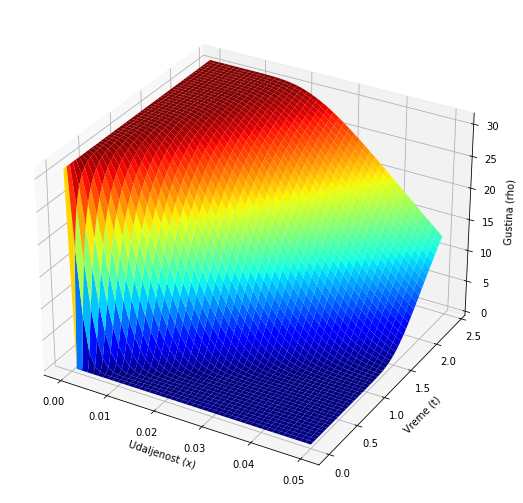

In [42]:
# parametri potrebni za primenu metode konacnih razlika
roadLength = 2.4 # km
time = 180 * (1/3600) # h
deltaX = 0.05 # km
deltaT = 0.1 * (1/3600) # h

def c(density):
    return max_velocity * (1 - 2 * density/max_density)

# inicijalizacija matrice
matrix_height = int(roadLength / deltaX) - 1
matrix_width = int(time / deltaT) - 1
matrix = np.zeros(shape=(matrix_height, matrix_width))

for i in range(matrix_width):
    matrix[0, i] = 0.3 * max_density
    
for i in range(1, matrix_height):
    for j in range(0, matrix_width - 1):
        matrix[i, j+1] = matrix[i, j] - (c(matrix[i, j]) * deltaT) / deltaX * (matrix[i, j] - matrix[i-1, j])
        
x_axis = np.linspace(0, roadLength, matrix_width)
y_axis = np.linspace(0, time, matrix_height)
X, Y = np.meshgrid(y_axis, x_axis)

fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.transpose(matrix), cmap='jet', linewidth=0, antialiased=True)
ax.set_xlabel('Udaljenost (x)')
ax.set_ylabel('Vreme (t)')
ax.set_zlabel('Gustina (rho)')
plt.show()

Nacrtati 2D grafik zavisnosti gustine vozila $\rho$ u funkciji od $x$ za tri vremenska trenutka (izabrati po želji, recimo $t = 100$, $120$ i $160$ sekudni ili neka druga tri vremenska trenutka koja bolje demonstriraju dinamiku promene gustine vozila). Obeležiti ose grafika i uneti legendu. 

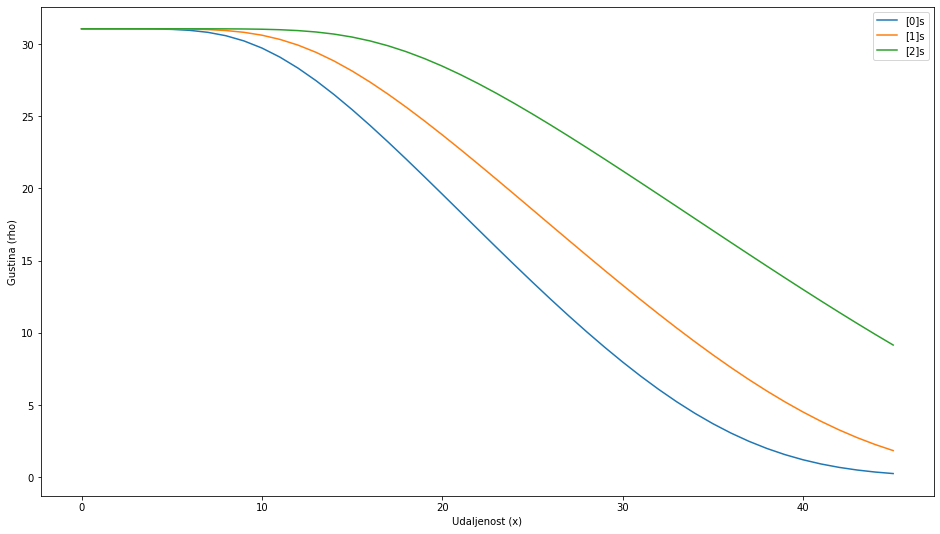

In [53]:
x = np.arange(matrix_height)
t = [100, 120, 160]

plt.figure(figsize=(16, 9))
for i in range(len(t)):
    t_conv = t[i] * (1/3600)
    plt.plot(x, matrix[:, int(t_conv / time * matrix_width)], label= str([i]) + "s")

plt.xlabel('Udaljenost (x)')
plt.ylabel('Gustina (rho)')    
plt.legend()
plt.show()

Komentarisati dobijene grafike i na osnovu njih objasniti ponašanje vozila u ovakvom modelu. 

Uneti komentar.

Diskutovati šta se dešava kada bi gužva na putu bila jako velika, odnosno kada bi gustina vozila iza semafora bila jako velika ($0.8\rho_\text{m}$). Ponoviti prethodni 3D kao i 2D grafik za promenjeni granični/početni uslov. 

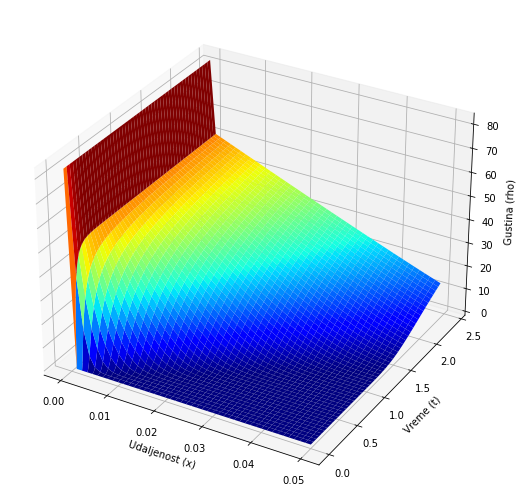

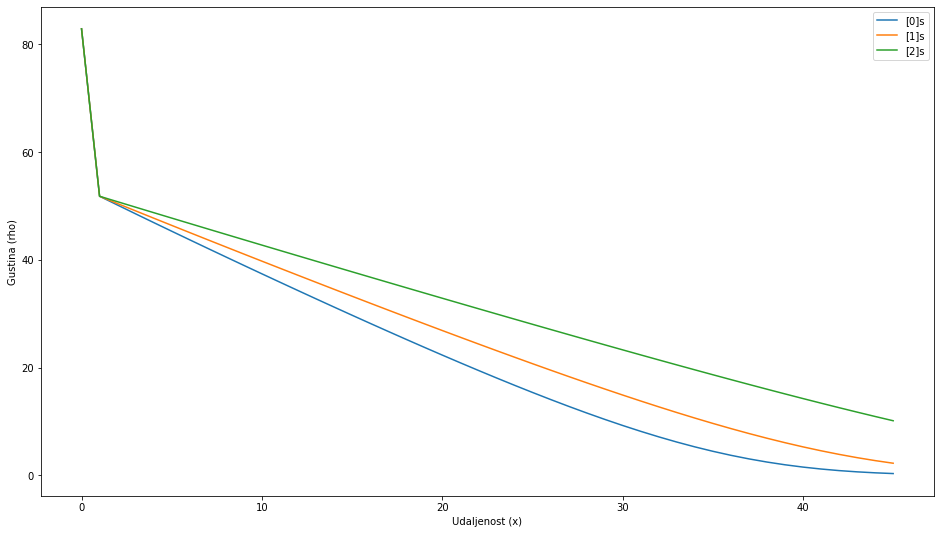

In [58]:
matrix = np.zeros((matrix_height, matrix_width))
for i in range(0, matrix_width):
    matrix[0, i] = 0.8 * max_density

for i in range(1, matrix_height):
    for j in range(0, matrix_width - 1):
        matrix[i, j+1] = matrix[i, j] - (c(matrix[i, j]) * deltaT)/deltaX * (matrix[i, j] - matrix[i-1, j])

x = np.linspace(0, roadLength, matrix_width)
y = np.linspace(0, time, matrix_height)
X, Y = np.meshgrid(y, x)

fig = plt.figure(figsize=(16, 9))
ax = fig.gca(projection='3d')
ax.set_xlabel("Udaljenost (x)")
ax.set_ylabel("Vreme (t)")
ax.set_zlabel("Gustina (rho)")
ax.plot_surface(X, Y, np.transpose(matrix), cmap='jet', linewidth=0, antialiased=True)
plt.show()

x = np.arange(matrix_height)
fig = plt.figure(figsize=(16, 9))
for i in range(len(t)):
    t_conv = t[i] * (1/3600)
    plt.plot(x, matrix[:, int(t_conv / time * matrix_width)], label= str([i]) + "s")
                 
plt.xlabel('Udaljenost (x)')
plt.ylabel('Gustina (rho)')    
plt.legend()
plt.show()

Uneti komentar.